# Cours PCD - Laboratoire 8 : Lissage exponentiel et prévision

## 1. Importation des librairies et de `statsmodels`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

## 3. Chargement des données

Chargement des données dans un objet `auscafe` et séparation en données d'entraînement et de test (test dès le 1er août 2010):

In [2]:
def split_series(series, ratio=0.8):
    return np.split(series, [int(ratio * len(series))])

In [3]:
data = pd.read_csv("data/auscafe.csv",  dtype = {"Y" : np.float32 }, parse_dates=["date"])

auscafe = pd.Series(np.array(data["Y"]), data["date"]) # Conversion en tableau numpy pour éviter de remplir de NaN (bug?)
train, test = split_series(auscafe)

## 4. Entraînement d'un modèle _Simple Exponential Smoothing_

Graphique des données d'origine:

Text(0, 0.5, 'Monthly expenses (billions of $)')

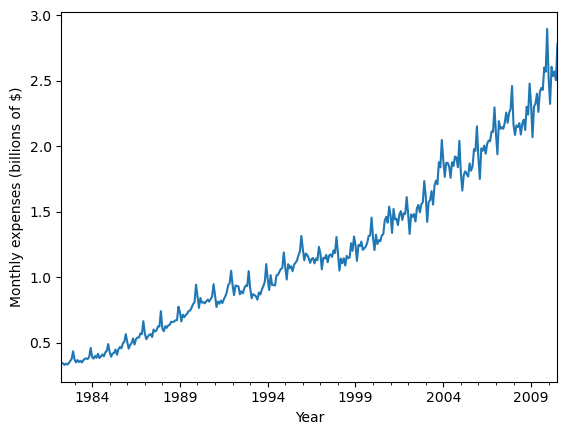

In [4]:
ax = train.plot()
ax.set_xlabel("Year")
ax.set_ylabel("Monthly expenses (billions of $)")

In [22]:
def plot_fit(fit, data):
    plt.figure(figsize=(8, 8))
    plt.plot(data, marker="o", markersize=4,color="black")
    plt.plot(fit.fittedvalues, marker="o", markersize=4, color="red")

/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


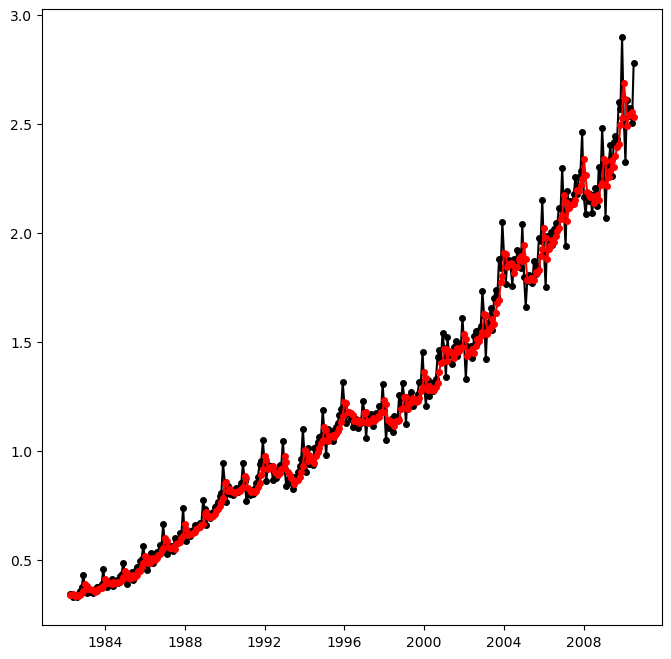

In [23]:
fit1 = SimpleExpSmoothing(train).fit()
plot_fit(fit1, train)